In [1]:
#!pip install tensorflow==2.4.0 tensorflow-gpu==2.4.1 tensorflow-io matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3)
ERROR: No matching distribution found for tensorflow==2.4.0


In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

C:\Users\Oran Nahum\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
SNORING_DATA_PATH = os.path.join('Snoring_Dataset','1')
NOT_SNORING_DATA_PATH = os.path.join('Snoring_Dataset','0')

In [4]:
SNORING_FILE = os.path.join(SNORING_DATA_PATH,'1_0.wav')
NOT_SNORING_FILE = os.path.join(NOT_SNORING_DATA_PATH,'0_0.wav')

In [5]:
os.listdir('./Snoring_Dataset/1')

['1_0.wav',
 '1_1.wav',
 '1_10.wav',
 '1_100.wav',
 '1_101.wav',
 '1_102.wav',
 '1_103.wav',
 '1_104.wav',
 '1_105.wav',
 '1_106.wav',
 '1_107.wav',
 '1_108.wav',
 '1_109.wav',
 '1_11.wav',
 '1_110.wav',
 '1_111.wav',
 '1_112.wav',
 '1_113.wav',
 '1_114.wav',
 '1_115.wav',
 '1_116.wav',
 '1_117.wav',
 '1_118.wav',
 '1_119.wav',
 '1_12.wav',
 '1_120.wav',
 '1_121.wav',
 '1_122.wav',
 '1_123.wav',
 '1_124.wav',
 '1_125.wav',
 '1_126.wav',
 '1_127.wav',
 '1_128.wav',
 '1_129.wav',
 '1_13.wav',
 '1_130.wav',
 '1_131.wav',
 '1_132.wav',
 '1_133.wav',
 '1_134.wav',
 '1_135.wav',
 '1_136.wav',
 '1_137.wav',
 '1_138.wav',
 '1_139.wav',
 '1_14.wav',
 '1_140.wav',
 '1_141.wav',
 '1_142.wav',
 '1_143.wav',
 '1_144.wav',
 '1_145.wav',
 '1_146.wav',
 '1_147.wav',
 '1_148.wav',
 '1_149.wav',
 '1_15.wav',
 '1_150.wav',
 '1_151.wav',
 '1_152.wav',
 '1_153.wav',
 '1_154.wav',
 '1_155.wav',
 '1_156.wav',
 '1_157.wav',
 '1_158.wav',
 '1_159.wav',
 '1_16.wav',
 '1_160.wav',
 '1_161.wav',
 '1_162.wav',
 '1

In [6]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [7]:
wave = load_wav_16k_mono(SNORING_FILE)
nwave = load_wav_16k_mono(NOT_SNORING_FILE)

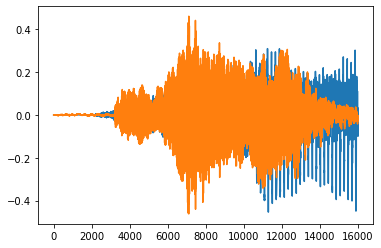

In [8]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [9]:
# POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
# NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [10]:
pos = tf.data.Dataset.list_files(SNORING_DATA_PATH+'\*.wav')
neg = tf.data.Dataset.list_files(NOT_SNORING_DATA_PATH+'\*.wav')

In [11]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [12]:
lengths = []
for file in os.listdir(os.path.join(NOT_SNORING_DATA_PATH)):
    tensor_wave = load_wav_16k_mono(os.path.join(NOT_SNORING_DATA_PATH, file))
    lengths.append(len(tensor_wave))

In [13]:
os.listdir(os.path.join(SNORING_DATA_PATH))

['1_0.wav',
 '1_1.wav',
 '1_10.wav',
 '1_100.wav',
 '1_101.wav',
 '1_102.wav',
 '1_103.wav',
 '1_104.wav',
 '1_105.wav',
 '1_106.wav',
 '1_107.wav',
 '1_108.wav',
 '1_109.wav',
 '1_11.wav',
 '1_110.wav',
 '1_111.wav',
 '1_112.wav',
 '1_113.wav',
 '1_114.wav',
 '1_115.wav',
 '1_116.wav',
 '1_117.wav',
 '1_118.wav',
 '1_119.wav',
 '1_12.wav',
 '1_120.wav',
 '1_121.wav',
 '1_122.wav',
 '1_123.wav',
 '1_124.wav',
 '1_125.wav',
 '1_126.wav',
 '1_127.wav',
 '1_128.wav',
 '1_129.wav',
 '1_13.wav',
 '1_130.wav',
 '1_131.wav',
 '1_132.wav',
 '1_133.wav',
 '1_134.wav',
 '1_135.wav',
 '1_136.wav',
 '1_137.wav',
 '1_138.wav',
 '1_139.wav',
 '1_14.wav',
 '1_140.wav',
 '1_141.wav',
 '1_142.wav',
 '1_143.wav',
 '1_144.wav',
 '1_145.wav',
 '1_146.wav',
 '1_147.wav',
 '1_148.wav',
 '1_149.wav',
 '1_15.wav',
 '1_150.wav',
 '1_151.wav',
 '1_152.wav',
 '1_153.wav',
 '1_154.wav',
 '1_155.wav',
 '1_156.wav',
 '1_157.wav',
 '1_158.wav',
 '1_159.wav',
 '1_16.wav',
 '1_160.wav',
 '1_161.wav',
 '1_162.wav',
 '1

In [14]:
lengths

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [15]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [16]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [17]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [18]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [19]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [155]:
wav = load_wav_16k_mono(filepath)
wav = wav[:16000]
wav

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([ 4.3634878e-07, -1.2576463e-06,  9.7290581e-07, ...,
        2.1081479e-01,  2.1024173e-01,  2.0672461e-01], dtype=float32)>

In [20]:
spectrogram, label = preprocess(filepath, label)

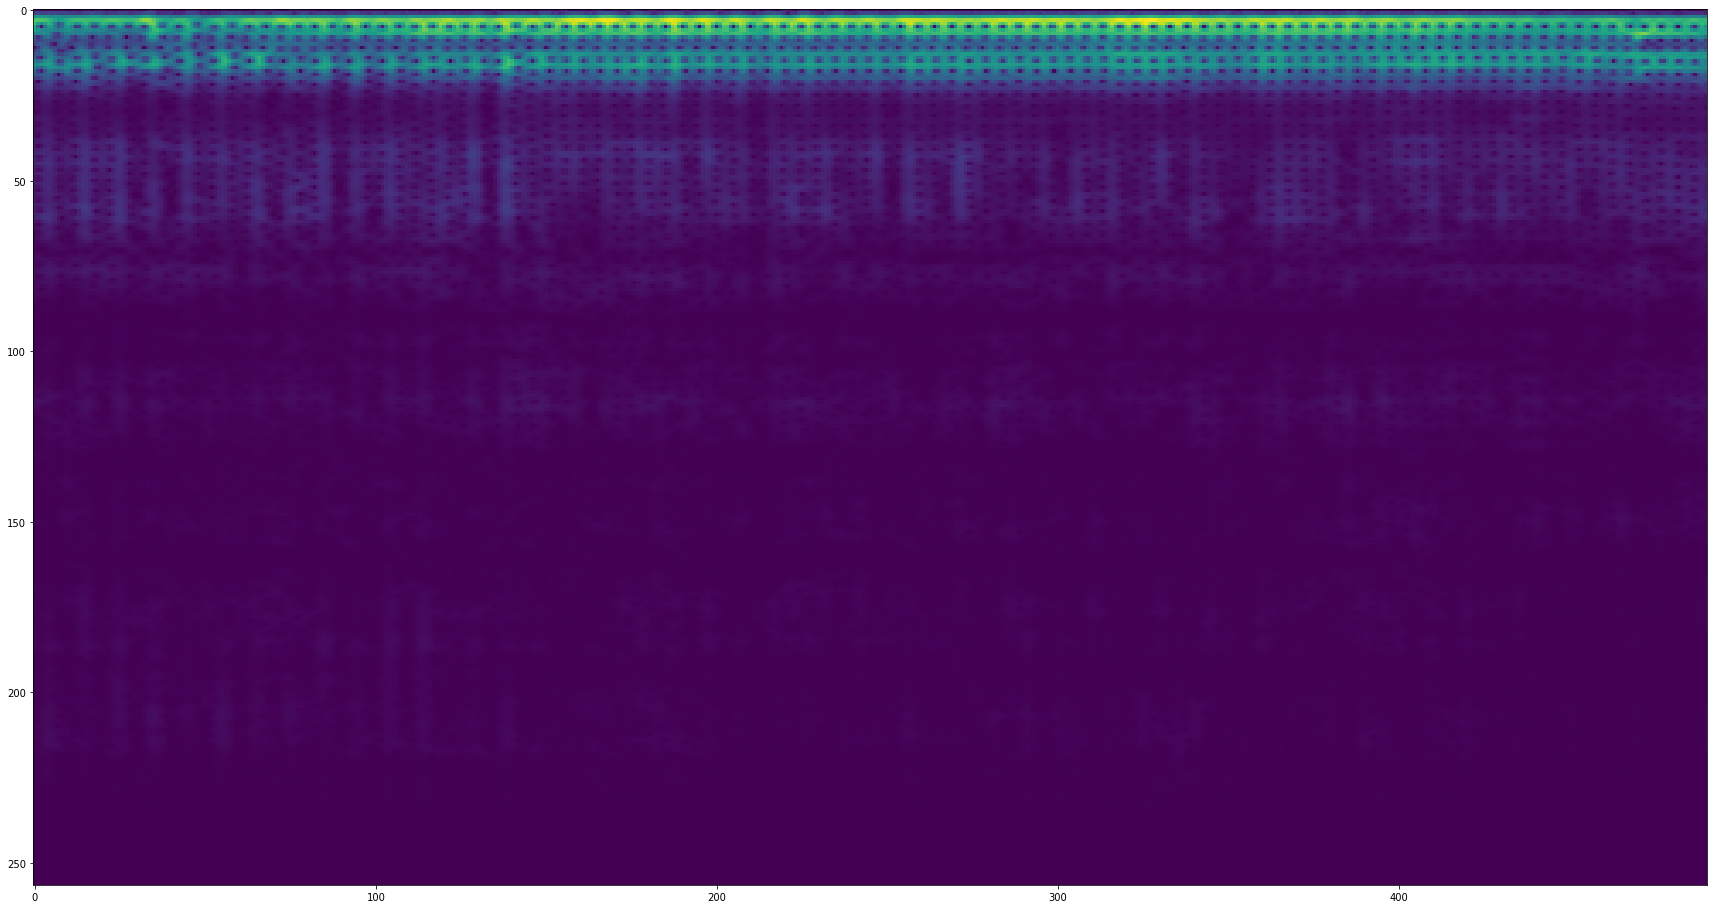

In [21]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [22]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [449]:
len(data)

63

In [453]:
import math
train = data.take(math.ceil(len(data)*.7))
test = data.skip(math.ceil(len(data)*.7)).take(math.floor(len(data)*.3))


45

In [25]:
samples, labels = train.as_numpy_iterator().next()

In [26]:
samples.shape

(16, 491, 257, 1)

In [27]:
input_shape = samples.shape[1:]
input_shape

(491, 257, 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 489, 255, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 487, 253, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 1971376)           0         
                                                                 
 dense (Dense)               (None, 128)               252336256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 252,338,865
Trainable params: 252,338,865
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
44/44 [==============================] - 60s 1s/step - loss: 7.3325 - recall: 0.7414 - precision: 0.7309 - val_loss: 0.2442 - val_recall: 0.8137 - val_precision: 0.9776
Epoch 2/10
44/44 [==============================] - 58s 1s/step - loss: 0.1673 - recall: 0.9472 - precision: 0.9688 - val_loss: 0.0733 - val_recall: 0.9932 - val_precision: 0.9542
Epoch 3/10
44/44 [==============================] - 58s 1s/step - loss: 0.0971 - recall: 0.9803 - precision: 0.9776 - val_loss: 0.0470 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/10
44/44 [==============================] - 57s 1s/step - loss: 0.0514 - recall: 0.9860 - precision: 0.9888 - val_loss: 0.0416 - val_recall: 0.9861 - val_precision: 1.0000
Epoch 5/10
44/44 [==============================] - 62s 1s/step - loss: 0.0408 - recall: 0.9944 - precision: 0.9972 - val_loss: 0.0307 - val_recall: 1.0000 - val_precision: 0.9934
Epoch 6/10
44/44 [==============================] - 67s 2s/step - loss: 0.0465 - recall: 0.9945 - pr

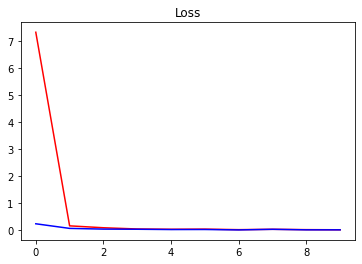

In [33]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

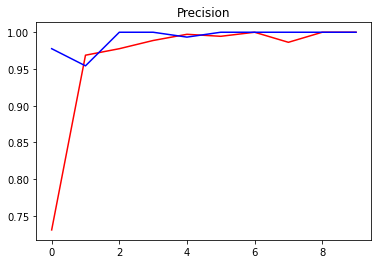

In [35]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

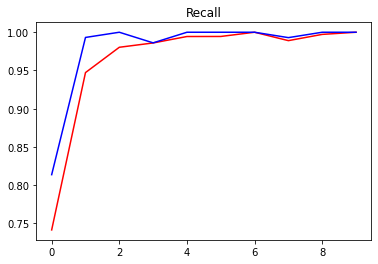

In [36]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [37]:
X_test, y_test = test.as_numpy_iterator().next()

In [59]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 169ms/step


In [60]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [61]:
yhat

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

In [62]:
y_test.astype(int)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [375]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [435]:
mp3 = os.path.join('output.mp3')

In [436]:
wav = load_mp3_16k_mono(mp3)

In [437]:
wav

<tf.Tensor: shape=(16346,), dtype=float32, numpy=
array([ 0.0000000e+00,  2.5425622e-06, -7.9144575e-06, ...,
        3.0682559e+00,  4.3735318e+00,  2.2271113e+00], dtype=float32)>

In [438]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)

In [439]:
samples, index = audio_slices.as_numpy_iterator().next()

In [440]:
len(audio_slices)

1

In [441]:
samples.shape

(1, 16000)

In [442]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([16000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [443]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [444]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 0s 393ms/step


In [445]:
yhat

[0]

In [446]:
if yhat[0] == 1:
    print("Snoring")
else:
    print("Not Snoring")

Not Snoring


In [447]:
from itertools import groupby

In [448]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [314]:
calls

0

In [170]:
#tf.keras.models.save_model(model, './saved_models/my_h5_model.h5')

In [171]:
#my_h5_saved_model = tf.keras.models.load_model(
#    './saved_models/my_h5_model.h5')

In [172]:
yhat = my_h5_saved_model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 1s 916ms/step


In [173]:
yhat

[0, 1]

In [125]:
from itertools import groupby

In [126]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [127]:
calls

0